Skenario 5
Size picture 170x170
Batch Size 64
Epochs 50
RMSprop

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage
from skimage.io import imread, imshow
from skimage import transform
from tqdm import tqdm
import tensorflow as tf

In [3]:
labels=list()
path='/content/drive/MyDrive/Skripsiku/Codingan/DATASET/'
os.listdir(path)
for i in os.listdir(path):
    labels.append(i)
labels

['goddess', 'plank', 'tree', 'warrior2', 'downdog']

In [4]:
downdog_dir = os.path.join('/content/drive/MyDrive/Skripsiku/Codingan/DATASET/downdog')
goddess_dir = os.path.join('/content/drive/MyDrive/Skripsiku/Codingan/DATASET/goddess')
plank_dir = os.path.join('/content/drive/MyDrive/Skripsiku/Codingan/DATASET/plank')
tree_dir = os.path.join('/content/drive/MyDrive/Skripsiku/Codingan/DATASET/tree')
warrior2_dir = os.path.join('/content/drive/MyDrive/Skripsiku/Codingan/DATASET/warrior2')

In [5]:
downdog_names = os.listdir(downdog_dir)
print(downdog_names[:5])
goddess_names = os.listdir(goddess_dir)
print(goddess_names[:5])
plank_names = os.listdir(plank_dir)
print(plank_names[:5])
tree_names = os.listdir(tree_dir)
print(tree_names[:5])
warrior2_names = os.listdir(warrior2_dir)
print(warrior2_names[:5])

['00000047.jpg', '00000031.jpg', '00000100.jpg', '00000090.jpg', '00000062.jpg']
['00000054.jpg', 'Goddess_18.jpg', '00000082.jpg', '00000072.jpg', 'Goddess_51.jpg']
['00000001.jpg', '00000068.jpg', '00000054.jpg', '00000012.jpg', '00000042.jpg']
['00000024.jpg', '00000060.jpg', 'Tree_37.jpg', '00000045.jpg', '00000002.jpg']
['00000000.jpg', '00000001.jpg', '00000003.jpg', '00000004.jpg', '00000002.jpg']


In [6]:
Total_sample=0
for i in os.listdir(path):
    print(f'Length of :{i}= {len(os.listdir(os.path.join(path,i)))}')
    Total_sample+=len(os.listdir(os.path.join(path,i)))
print(f'Total Samples:{Total_sample}')

Length of :goddess= 322
Length of :plank= 322
Length of :tree= 322
Length of :warrior2= 322
Length of :downdog= 322
Total Samples:1610


In [7]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [8]:
img_size=170
X=[] 
Y=[]
i=0
for idx,img in enumerate(os.listdir(path)):
    for img_name in tqdm(os.listdir(path+img)):
        if i<322:
            img_file=imread(path+img+'/'+img_name)
            if img_file is not None:
                img_file=transform.resize(img_file,(img_size,img_size,3))
                X.append(img_file)
                Y.append(idx)
        else:
            break
        i=i+1
    i=0
X=np.asarray(X)
Y=np.asarray(Y)

100%|██████████| 322/322 [01:11<00:00,  4.50it/s]


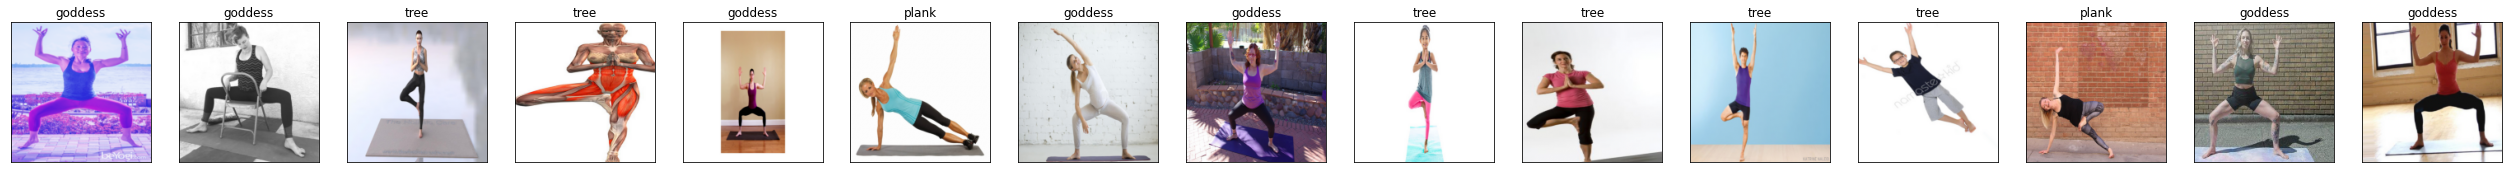

In [9]:
from random import randint
n = 50  # how many digits we will display
plt.figure(figsize=(150,40))
for i in range(5,20):
    # display original
    rn=randint(0,987)
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X[rn])
    plt.title(labels[Y[rn]])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y)
print('Shapes of Data Split into Train & Test Part')
print(f'Training Data->{X_train.shape},{Y_train.shape} Testing Data->{X_test.shape,Y_test.shape}')

Shapes of Data Split into Train & Test Part
Training Data->(1288, 170, 170, 3),(1288,) Testing Data->((322, 170, 170, 3), (322,))


In [27]:
from keras.utils.np_utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=len(labels))
Y_test=to_categorical(Y_test,num_classes=len(labels))

In [28]:
Y_train.shape, Y_test.shape

((1288, 5), (322, 5))

In [29]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(170, 170, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(labels), activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='RMSprop'
             ,metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 168, 168, 32)      896       
                                                                 
 batch_normalization_10 (Bat  (None, 168, 168, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 84, 84, 32)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 84, 84, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 82, 82, 64)        18496     
                                                                 
 batch_normalization_11 (Bat  (None, 82, 82, 64)      

In [30]:
from time import time
tic=time()
epoch=50
history=model.fit(X_train,Y_train,validation_split=0.2,epochs=epoch,batch_size=32,verbose=1)
toc=time()
print(f'Training Time {toc-tic}')

Epoch 1/50
33/33 [==============================] - 3s 60ms/step - loss: 2.2385 - accuracy: 0.2903 - val_loss: 1.6589 - val_accuracy: 0.1783
Epoch 2/50
33/33 [==============================] - 2s 51ms/step - loss: 1.6642 - accuracy: 0.4068 - val_loss: 1.9042 - val_accuracy: 0.1977
Epoch 3/50
33/33 [==============================] - 2s 50ms/step - loss: 1.3258 - accuracy: 0.5058 - val_loss: 2.0444 - val_accuracy: 0.1977
Epoch 4/50
33/33 [==============================] - 2s 51ms/step - loss: 1.2148 - accuracy: 0.5456 - val_loss: 2.0435 - val_accuracy: 0.1977
Epoch 5/50
33/33 [==============================] - 2s 51ms/step - loss: 1.0434 - accuracy: 0.5883 - val_loss: 2.1468 - val_accuracy: 0.1977
Epoch 6/50
33/33 [==============================] - 2s 51ms/step - loss: 0.8654 - accuracy: 0.6631 - val_loss: 1.9077 - val_accuracy: 0.2364
Epoch 7/50
33/33 [==============================] - 2s 50ms/step - loss: 0.8422 - accuracy: 0.6806 - val_loss: 1.7070 - val_accuracy: 0.2481
Epoch 8/50
33

Text(0.5, 1.0, 'Loss evolution')

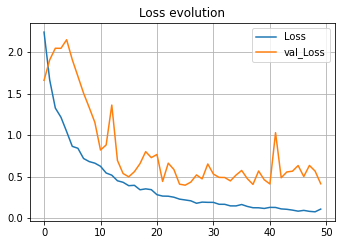

In [31]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

Text(0.5, 1.0, 'Accuracy')

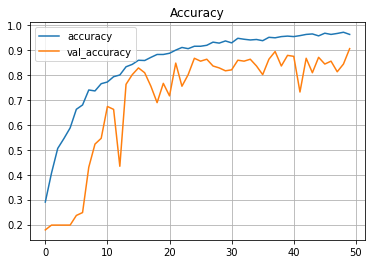

In [32]:
plt.subplot(1,1,1)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy')

In [33]:
score=model.evaluate(X_test,Y_test,verbose=1)

11/11 [==============================] - 0s 16ms/step - loss: 0.2462 - accuracy: 0.9410


In [34]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
print(y_pred)

11/11 [==============================] - 0s 14ms/step
[0 4 0 4 3 4 1 4 0 0 3 0 3 4 4 1 3 0 2 1 4 2 2 3 1 2 2 4 2 2 0 2 2 3 3 1 0
 3 4 2 1 2 4 0 4 2 1 3 0 4 1 3 1 2 3 4 3 3 3 2 1 1 3 4 0 3 1 0 4 0 0 2 3 3
 3 2 4 0 1 2 0 1 1 1 1 1 2 0 0 4 3 2 4 3 0 2 3 0 3 0 2 2 4 4 2 3 3 2 2 4 4
 4 3 2 2 4 1 0 0 4 4 4 0 1 1 1 0 4 0 3 3 2 3 1 4 3 0 1 1 4 3 1 4 3 4 3 3 3
 4 3 1 4 4 0 4 1 2 3 0 3 0 0 0 3 2 4 1 1 3 0 0 1 1 3 2 3 3 0 2 1 1 0 4 1 0
 4 0 1 2 0 1 4 0 0 3 0 0 1 0 3 4 1 0 2 4 4 3 1 2 3 4 4 4 4 0 2 0 1 2 0 1 4
 1 1 1 3 3 1 2 0 3 0 2 1 3 0 1 2 2 3 2 3 1 4 2 2 3 1 0 1 2 1 2 1 3 4 4 4 0
 4 1 3 0 2 2 4 1 2 0 2 4 0 0 0 4 0 3 0 0 4 3 3 1 3 0 1 3 4 0 0 2 3 4 0 3 0
 2 4 3 2 4 3 3 3 4 0 1 0 1 0 1 2 1 3 4 3 1 0 2 2 2 1]


In [35]:
Y_test=np.argmax(Y_test,axis=1)
print(Y_test)

[0 4 2 4 3 4 1 4 0 0 3 0 3 4 4 1 3 0 2 1 4 2 2 3 1 2 2 4 2 2 3 2 2 0 3 1 0
 3 4 2 1 2 4 0 4 2 1 1 0 4 1 3 4 2 1 4 3 3 3 2 1 1 3 4 0 3 1 2 4 1 0 2 3 3
 3 2 4 0 1 2 2 4 1 1 1 1 2 0 0 4 1 2 4 3 0 2 3 0 3 0 2 2 4 4 2 3 3 2 2 4 4
 4 3 2 2 4 1 0 0 4 4 4 0 1 1 1 0 4 0 3 3 2 3 1 4 3 0 1 1 4 3 1 4 3 4 3 3 3
 4 3 1 4 4 0 4 1 2 3 0 0 0 0 0 3 2 4 1 1 3 0 0 1 1 3 2 3 3 0 2 1 1 0 4 1 0
 4 2 2 2 0 1 4 0 0 3 0 0 1 0 3 4 1 0 2 4 4 3 1 2 3 4 4 4 4 0 2 0 1 2 2 1 3
 1 1 1 3 3 1 2 0 3 0 2 1 3 0 1 2 2 3 2 3 1 4 2 2 3 1 0 1 2 1 2 1 3 4 4 4 0
 4 1 3 0 2 2 4 1 2 0 2 4 0 0 2 4 0 3 2 0 4 3 0 1 3 0 1 3 4 0 0 2 3 4 0 3 0
 2 4 3 2 4 3 3 3 4 0 1 0 1 0 1 2 1 3 4 3 1 0 2 2 2 1]


In [36]:
from sklearn import metrics
print(metrics.classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        64
           1       0.95      0.94      0.94        64
           2       1.00      0.88      0.93        65
           3       0.91      0.97      0.94        65
           4       0.98      0.97      0.98        64

    accuracy                           0.94       322
   macro avg       0.94      0.94      0.94       322
weighted avg       0.94      0.94      0.94       322



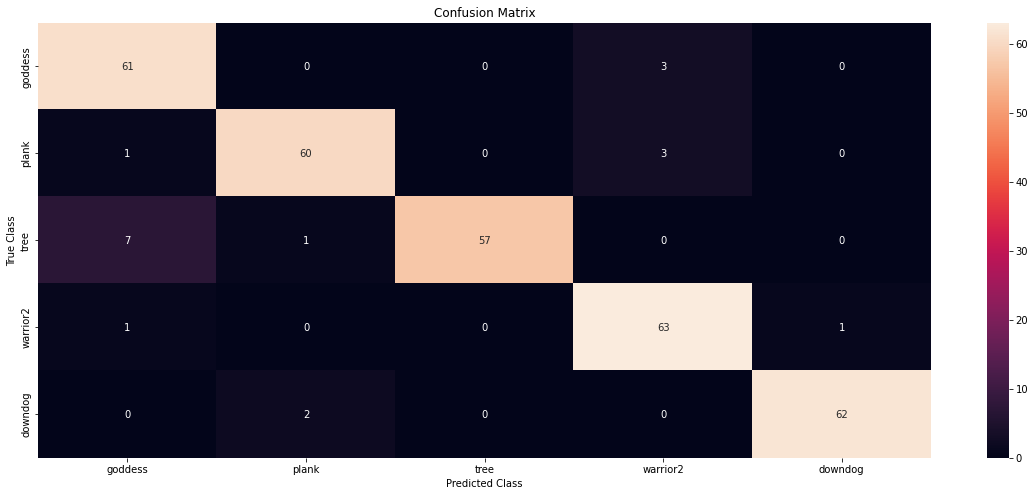

In [37]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# define the matrix with the real classes and the predicted
m = confusion_matrix(Y_test, y_pred)
# the labels for the plot
plt.figure(figsize=(20, 8))
# create the plot
heatmap = sns.heatmap(m, xticklabels=labels, yticklabels=labels, annot=True, fmt='d', color='blue')
# labels for the axes
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

11/11 [==============================] - 0s 14ms/step


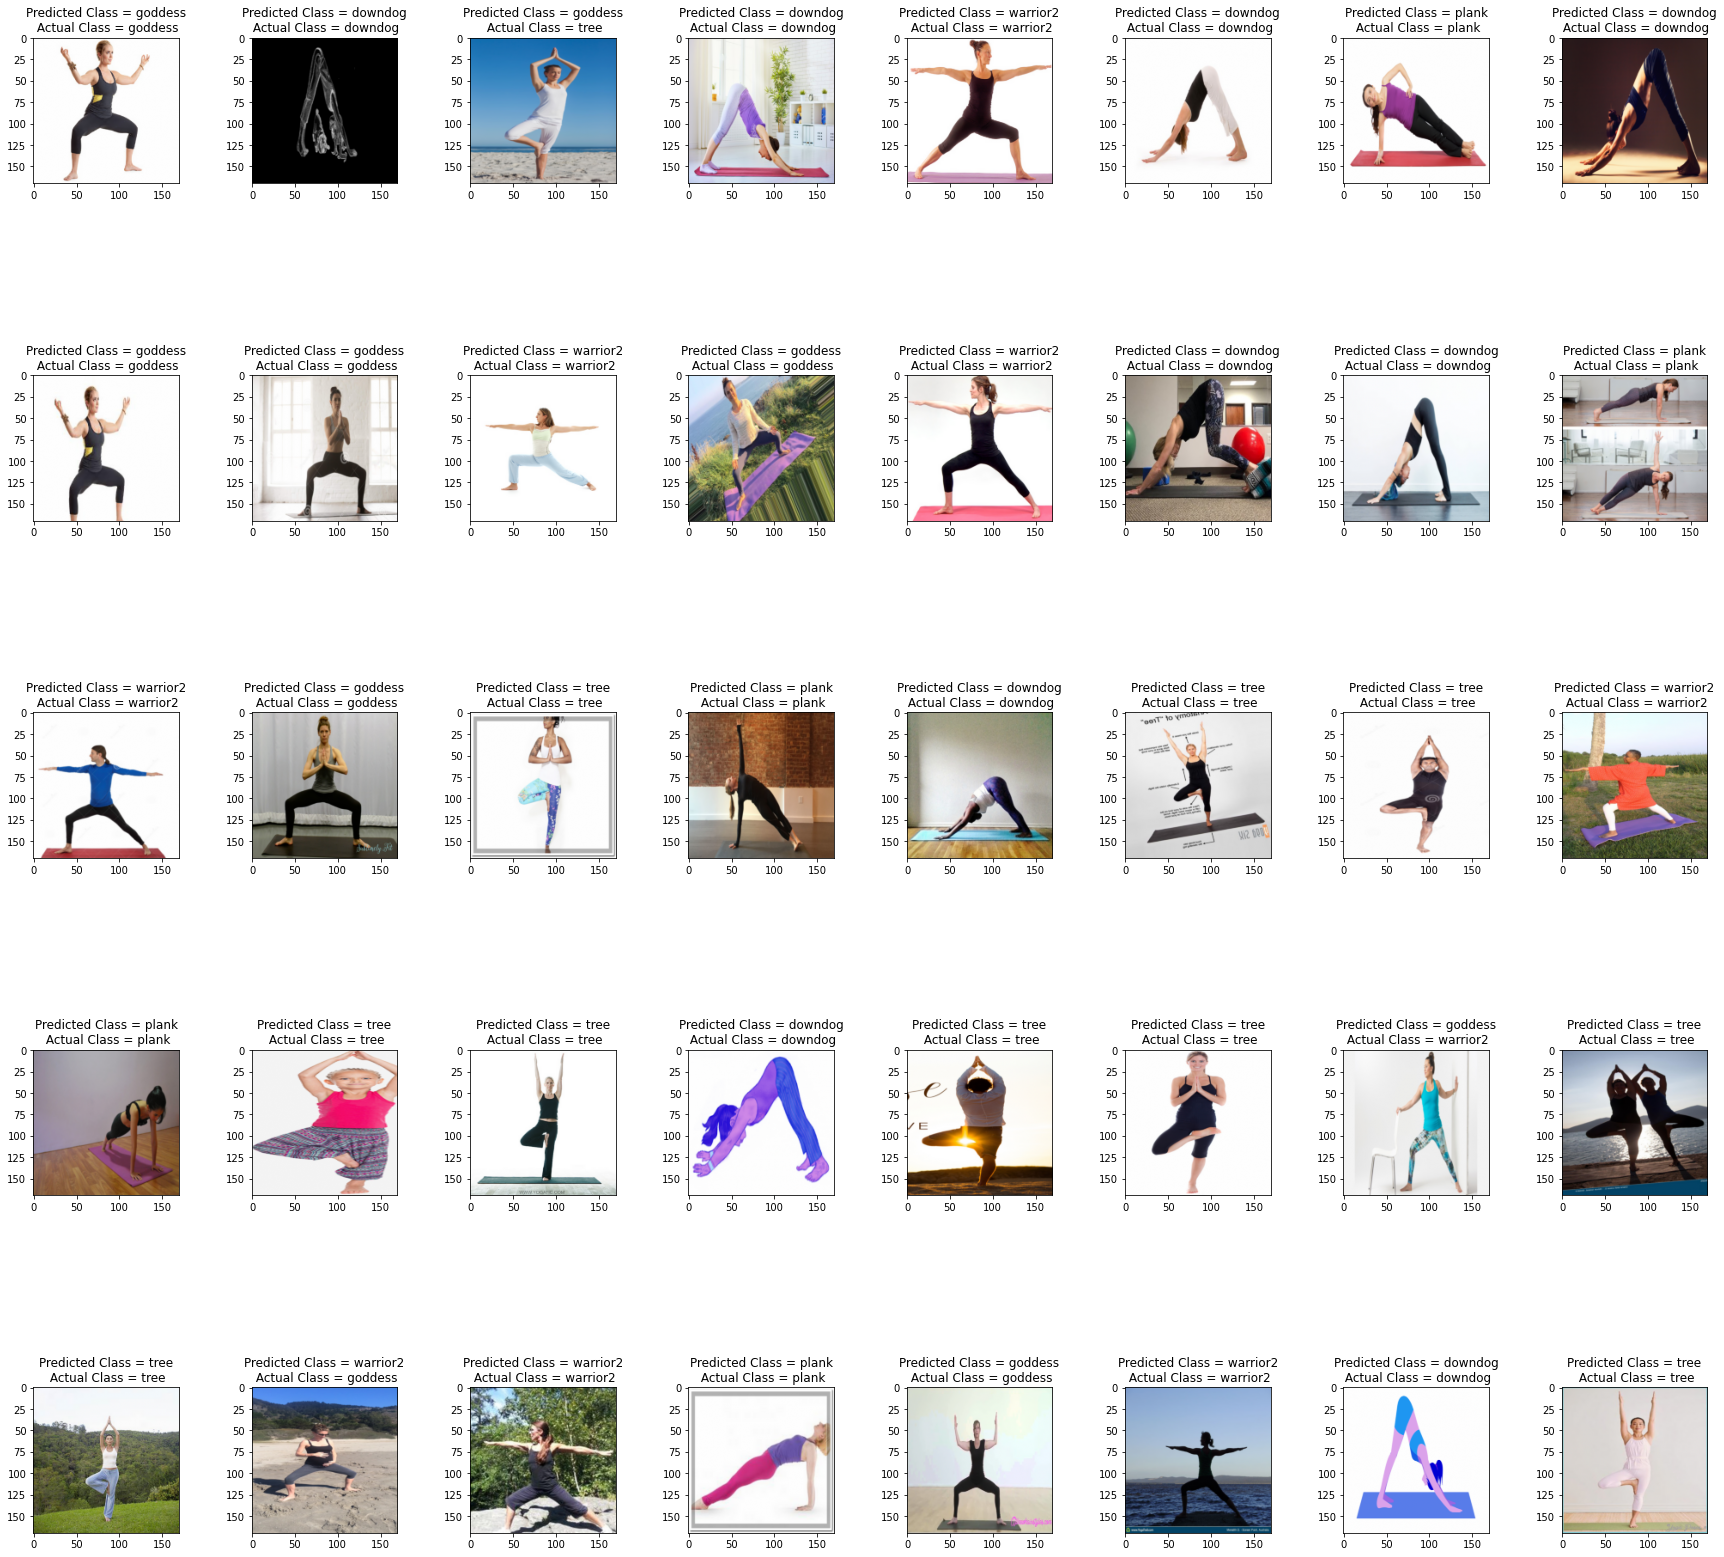

In [38]:
predicted_classes=model.predict(X_test)
predicted_classes=np.argmax(predicted_classes,1)
Y_classes=Y_test
L = 5
W = 8
fig, axes = plt.subplots(L, W, figsize = (30,30))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Predicted Class = {labels[predicted_classes[i]]}\n Actual Class = {labels[Y_classes[i]]}")
    axes[i].axis('on')
plt.subplots_adjust(wspace=0.5)

In [39]:
model.save('Skenario5.h5')
model.save('Skenario5.hdf5')